In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

In [42]:
# stehende Mikrowellen
V1_1 = pd.read_csv('./19_Mikrowellen/V1_1.csv', sep = ',', skipinitialspace = True)

V1_1_x = V1_1['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_1_E = V1_1['E'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# Lecherleitung
V1_3 = pd.read_csv('./19_Mikrowellen/V1_3.csv', sep = ',', skipinitialspace = True)

V1_3_x = V1_3['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_3_E = V1_3['E'].str.strip().drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# curve_fit
def E(x, E0, k, a):
    return 2*E0*abs(np.sin(k*x - a))#*np.sin(w*t)

In [44]:
# Bestimmung der Fitparameter
popt_1_1, pcov_1_1 = curve_fit(E, V1_1_x, V1_1_E, bounds = ([2., 0., 0.], [12., 0.75, 100.]))
popt_1_3, pcov_1_3 = curve_fit(E, V1_3_x, V1_3_E)

popt_1_1, popt_1_3

(array([ 3.08173225,  0.37263228, 49.7293323 ]),
 array([1.53168205, 0.999857  , 1.04374486]))

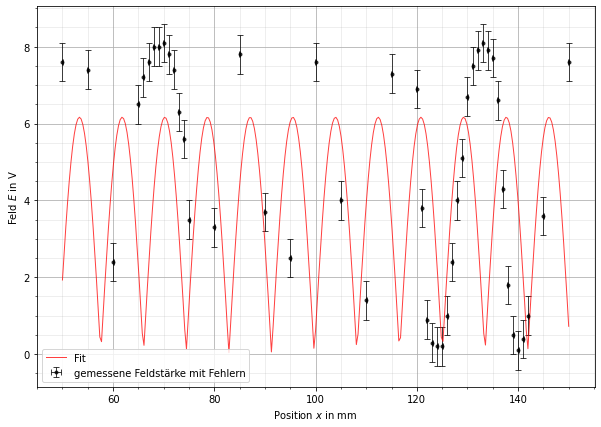

In [45]:
fig, ax = plt.subplots(figsize=(5*2,3.5*2))

xplot_1_1 = np.linspace(min(V1_1_x), max(V1_1_x), 299)
#print(E(xplot_1_1, *popt_1_1))

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Feld $E$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(V1_1_x, V1_1_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
#ax.errorbar([2, 1], [1, 2], xerr = 4)
#ax.plot(xplot, xplot*params_gamma[0]+params_gamma[1],  color = 'red', alpha = 0.75, linewidth=1.5, label = 'lineare Regression', linestyle = '--')
ax.plot(xplot_1_1, E(xplot_1_1, *popt_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = 'Fit')
ax.legend()
ax.legend(loc="lower left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

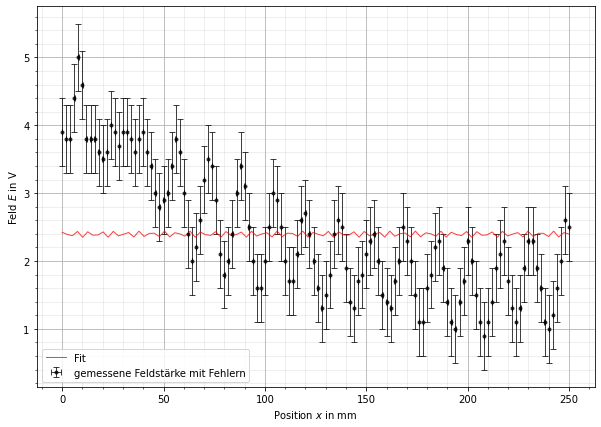

In [14]:
fig, ax = plt.subplots(figsize=(5*2,3.5*2))

xplot_1_3 = np.linspace(min(V1_3_x), max(V1_3_x), 100)

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Feld $E$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(V1_3_x, V1_3_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
#ax.errorbar([2, 1], [1, 2], xerr = 4)
#ax.plot(xplot, xplot*params_gamma[0]+params_gamma[1],  color = 'red', alpha = 0.75, linewidth=1.5, label = 'lineare Regression', linestyle = '--')
#ax.plot(V1_1_x, V1_1_E)
ax.plot(xplot_1_3, E(xplot_1_3, *popt_1_3), color = 'red', alpha = 0.75, linewidth = 1, label = 'Fit')
ax.legend()
ax.legend(loc="lower left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()